## Curve-fitting example for a nonlinear model
Implementation of curve-fitting in Python using `curve_fit` from the `optimize` sub-module of `scipy`.
In this notebook `curve_fit` is used to fit a non-linear model, but it also works on linear models.
In the case of linear models you do not need to specify initial estimates of the fit parameters.

Marty Ligare, August 2020

In [2]:
import numpy as np
from scipy import optimize

import urllib  # Use if importing data or figures from a URL

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

#### Define function to be fit<br>Determine initial parameters for search

In [4]:
def fun(x, a, b, c, d):
    '''Gaussian fit function'''
    return a*np.exp(-(x-b)**2/2/c**2) + d

#### Read in data

In [5]:
# If data file is local, use:
#data = np.loadtxt("sample2.dat")  # Each line in file corresponds to 
                                  # single data point: x,y,u
    
#OR load data from PHYS 310 web page: 
link = 'http://www.eg.bucknell.edu/~phys310/jupyter/sample2.dat'
f = urllib.request.urlopen(link)
data = np.loadtxt(f)

x = data.T[0]                     # The .T gives transpose of array
y = data.T[1]
u = data.T[2]

In [6]:
# More "pythonic" reading of data
# The "unpack = True" reads columns.

link = 'http://www.eg.bucknell.edu/~phys310/jupyter/sample2.dat'
f = urllib.request.urlopen(link)
x, y, u = np.loadtxt(f, unpack=True)

#### Plot raw data

<IPython.core.display.Javascript object>


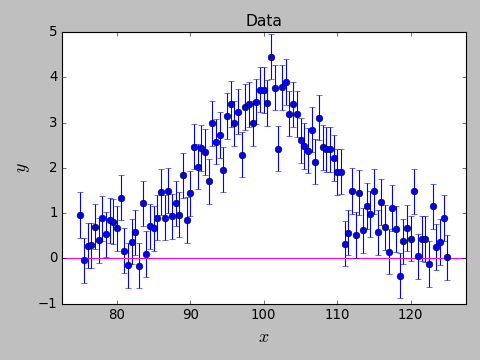

In [7]:
# "quasi-continuous" set of x's for plotting of function: 
plt.figure()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Data')
plt.axhline(0, color='magenta')
# Pad x-range on plot: 
plt.xlim(min(x) - 0.05*(max(x) - min(x)), max(x) + 0.05*(max(x) - min(x)))  
plt.errorbar(x, y, yerr=u, fmt='o');

#### Initial "guesses" for parameters a,b,c,d

In [8]:
p0 = 3.5, 105., 8, 0.2

<IPython.core.display.Javascript object>


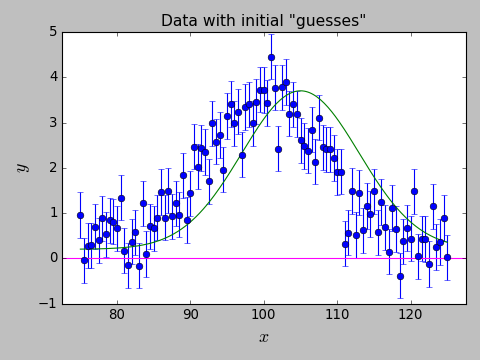

In [9]:
plt.figure()
# "quasi-continuous" set of x's for plotting of function:
xfine = np.linspace(min(x), max(x), 201)  
plt.errorbar(x, y, yerr=u, fmt='o')
plt.plot(xfine, fun(xfine, *p0))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Data with initial "guesses"')
plt.axhline(0, color='magenta')
# Pad x-range on plot:
plt.xlim(min(x) - 0.05*(max(x) - min(x)), max(x) + 0.05*(max(x) - min(x)));

#### Fit data<br>Plot fit-function with optimized parameters

In [10]:
popt, pcov = optimize.curve_fit(fun, x, y, p0, sigma=u)

<IPython.core.display.Javascript object>


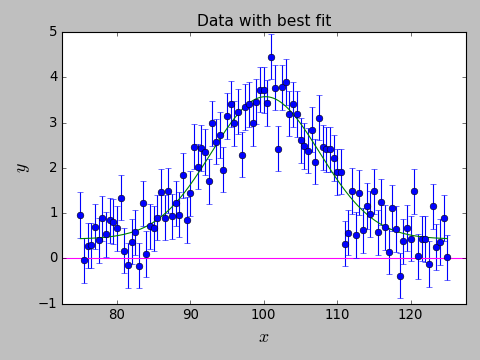

In [11]:
plt.figure()
# "quasi-continuous" set of x's for plotting of function:
xfine = np.linspace(min(x), max(x), 201)  
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Data with best fit')
plt.axhline(0, color='magenta')
# Pad x-range on plot:
plt.xlim(min(x) - 0.05*(max(x) - min(x)), max(x) + 0.05*(max(x) - min(x)))  
plt.errorbar(x, y, yerr=u, fmt='o')
plt.plot(xfine, fun(xfine, *popt));

In [12]:
popt  # Best fit parameters

array([  3.14460892, 100.23117971,   7.38727197,   0.42571678])

In [13]:
pcov # Covariance matrix

array([[ 1.67663126e-02, -1.05668886e-05,  2.26802071e-03,
        -6.49513991e-03],
       [-1.05668886e-05,  8.90738363e-02, -4.43390527e-05,
         1.41820927e-05],
       [ 2.26802071e-03, -4.43390527e-05,  1.85823439e-01,
        -2.95868683e-02],
       [-6.49513991e-03,  1.41820927e-05, -2.95868683e-02,
         9.05098466e-03]])

In [14]:
for i in range(len(popt)):  
    print("parameter", i,"=", popt[i], "+/-", np.sqrt(pcov[i,i]))

parameter 0 = 3.1446089204749854 +/- 0.1294847969216292
parameter 1 = 100.23117970689839 +/- 0.2984524019935297
parameter 2 = 7.3872719667334215 +/- 0.4310724288344981
parameter 3 = 0.4257167818446636 +/- 0.09513666306803406


NOTE:

`absolute_sigma=True` is equivalent to Mathematica `VarianceEstimatorFunction-> (1&)`.<br>
`Fals`e gives covariance matrix based on estimated errors in data (weights are just relative).

In [15]:
popt, pcov2 = optimize.curve_fit(fun, x, y, p0, sigma=u, absolute_sigma=True)

In [16]:
for i in range(len(popt)):  
    print("parameter", i,"=", popt[i], "+/-", np.sqrt(pcov2[i,i]))

parameter 0 = 3.1446089204749854 +/- 0.1408373281344231
parameter 1 = 100.23117970689839 +/- 0.3246191048784681
parameter 2 = 7.3872719667334215 +/- 0.4688665430445275
parameter 3 = 0.4257167818446636 +/- 0.10347773447284625


<IPython.core.display.Javascript object>


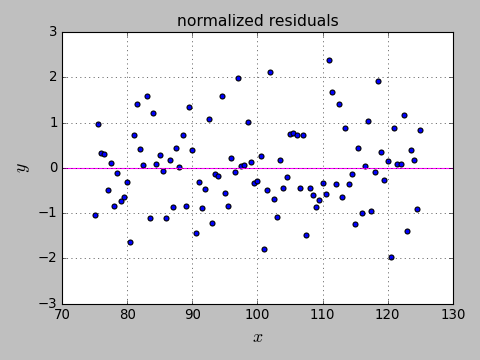

In [17]:
plt.figure()
r = (fun(x, *popt) - y)/u   # calculate residuals
plt.scatter(x,r)
plt.axhline(0, color='magenta')
plt.title('normalized residuals')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid();

Calculation of reduced chi-square parameter:

\begin{equation}
\chi_R^2= \frac{1}{N-c}\times\sum_{i=1}^N \frac{(y_i-f(x_i))^2}{\sigma_i^2}, 
\end{equation}


In [18]:
np.sum((y - fun(x, *popt))**2/u**2)/(len(data) - 4)

0.8452827481179599

#### Version details
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [19]:
%load_ext version_information

In [21]:
%version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.7.1908 Core
numpy 1.18.5
scipy 1.5.2
matplotlib 3.3.0
Fri Aug 07 13:08:15 2020 EDT